In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

# Question: Is the new bus route improving commute?

Previous route had a mean commute time of 36 minutes (~ *N* $\mu = 36, \sigma = 6$)

## Null Hypothesis ($H_0$):

The mean of the new bus route is the same or bigger than the mean of the previous one. 

## Alternative Hypothesis

The mean of the new bus route is the smaller than the mean of the previous one. 

$$H_0 : \mu_{new} >= \mu_{prev} $$

$$H_a : \mu_{new} < \mu_{prev} $$

## Confidence level: 95%
Significance threshold  $\alpha=0.05$


In [11]:
alpha = 0.05
data = pd.read_csv('times.txt',header=None)

To test this hypothesis is necessary to calculate the mean and standard deviation for the new bus route (the previous ones already known).

In [3]:
#Previous bus route mean and standard deviation
stdPrev = 6
meanPrev = 36

#New bus route mean and standard deviation
stdNew = data[0].std()
meanNew = data[0].mean()

print "Previous route's: mean = %1.1f and standard deviation = %1.1f" %(meanPrev,stdPrev)
print "New route's: mean = %1.1f and standard deviation = %1.1f" %(meanNew,stdNew)

Previous route's: mean = 36.0 and standard deviation = 6.0
New route's: mean = 34.5 and standard deviation = 7.1


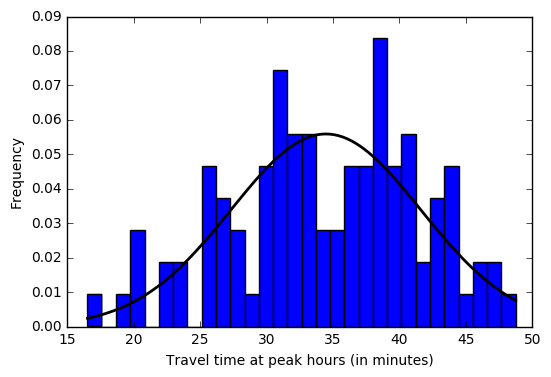

In [4]:
#Plot the sample histogram and the normal distirbution
x = np.linspace(min(data[0]), max(data[0]), len(data[0]))
p = st.norm.pdf(x, meanNew, stdNew)
plt.plot(x,p, 'k', linewidth=2)
plt.hist(data[0], normed=True, bins=30)
plt.xlabel('Travel time at peak hours (in minutes)')
plt.ylabel('Frequency')


## Figure 1: 
Distirbution for the sample of the new bus route and the normal distribution 


The Z value stablish a way to compare the mean of the new sample to the mean of the previous route, in terms of it's standard deviation.

In [5]:
def zFunction(meanPop,meanSample,stdPop,N):
    z = (meanPop - meanSample) / (stdPop / math.sqrt(N))
    return z

zValue = zFunction(meanPop = meanPrev, meanSample = meanNew, stdPop = stdPrev, N = len(data[0]))

print 'The mean of the new route, assuming the previous route values \
where normaly distirbuted, is %1.2f standard deviations away from the mean \
of the previous route.' %zValue


The mean of the new route, assuming the previous route values where normaly distirbuted, is 2.56 standard deviations away from the mean of the previous route.


Therefore, the question is if this difference is due to a random variation or, instead, is statistically significant enough. Precisely, what is the propapility of our new meassure, under the assumption that the Null Hypothesis ($H_0$) is valid ($ p(m | H_0) $). The statistical significance is given by the threshold establish at the beginning. In this case,  the hypothesis expects a variation in a precise way, meaning we expect the new mean to be lower than que previous. Therefore, the distance in means related to the standar deviation (the Z value) will be positive. So, the distance will be enough so that the probability of that meassure under the asumption of a valid $H_0$, will be lower than our stablished $\alpha = 5 \% $.

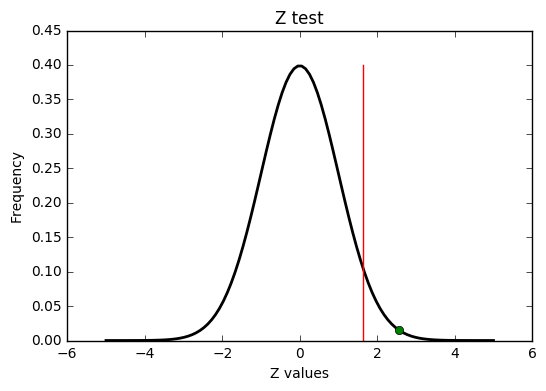

In [23]:
threshold = st.norm.ppf(1-alpha)
probability = 1 - st.norm.cdf(zValue)

x = np.linspace(-5, 5, 100)
p = st.norm.pdf(x, 0, 1)
plt.plot(x,p, 'k', linewidth=2)
plt.plot(zValue,st.norm.pdf(zValue, 0, 1),'go')
plt.plot([threshold, threshold], [0, 0.4],color='red')
plt.title('Z test')
plt.xlabel('Z values')
plt.ylabel('Frequency')

## Figure 2:
The z value for the new messure is behond the threshold stabished at the beginning of the exercise

In conclusion, the probaility of our new meassure, under the assumption that the Null Hypothesis ($H_0$) is valid ($ p(m | H_0) $), is smaller than the significance threshold stablished. Therefore we can reject the Null Hypothesis with a confidence level of 95%. 

In [25]:
print 'p(m|H0) = %1.4f' %probability

p(m|H0) = 0.0053
